<h2 style = "color:green" align="center" >Pima_Indians_Diabetes</h2>

## Ensemble Learning - Bagging

 Ensemble learning helps improve machine learning results by combining several models. This approach allows the production of better predictive performance compared to a single model. Basic idea is to learn a set of classifiers (experts) and to allow them to vote. Bagging and Boosting are two types of Ensemble Learning. These two decrease the variance of a single estimate as they combine several estimates from different models. So the result may be a model with higher stability. Let’s understand these two terms in a glimpse.

Bagging: It is a homogeneous weak learners’ model that learns from each other independently in parallel and combines them for determining the model average.
Boosting: It is also a homogeneous weak learners’ model but works differently from Bagging. In this model, learners learn sequentially and adaptively to improve model predictions of a learning algorithm.

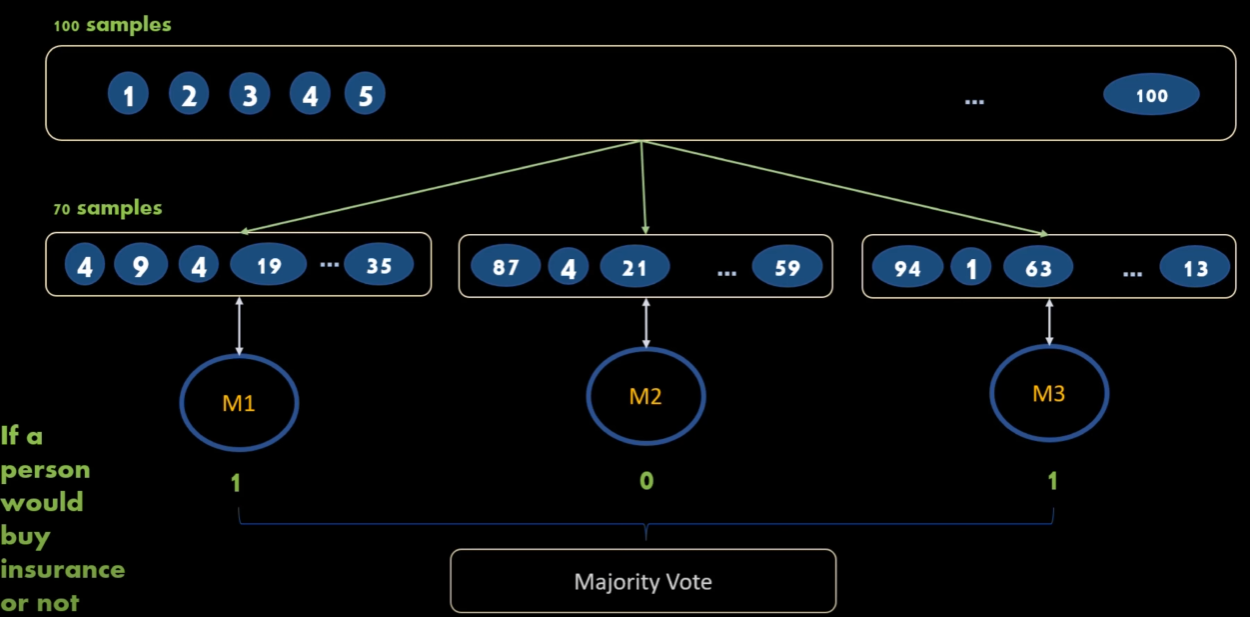

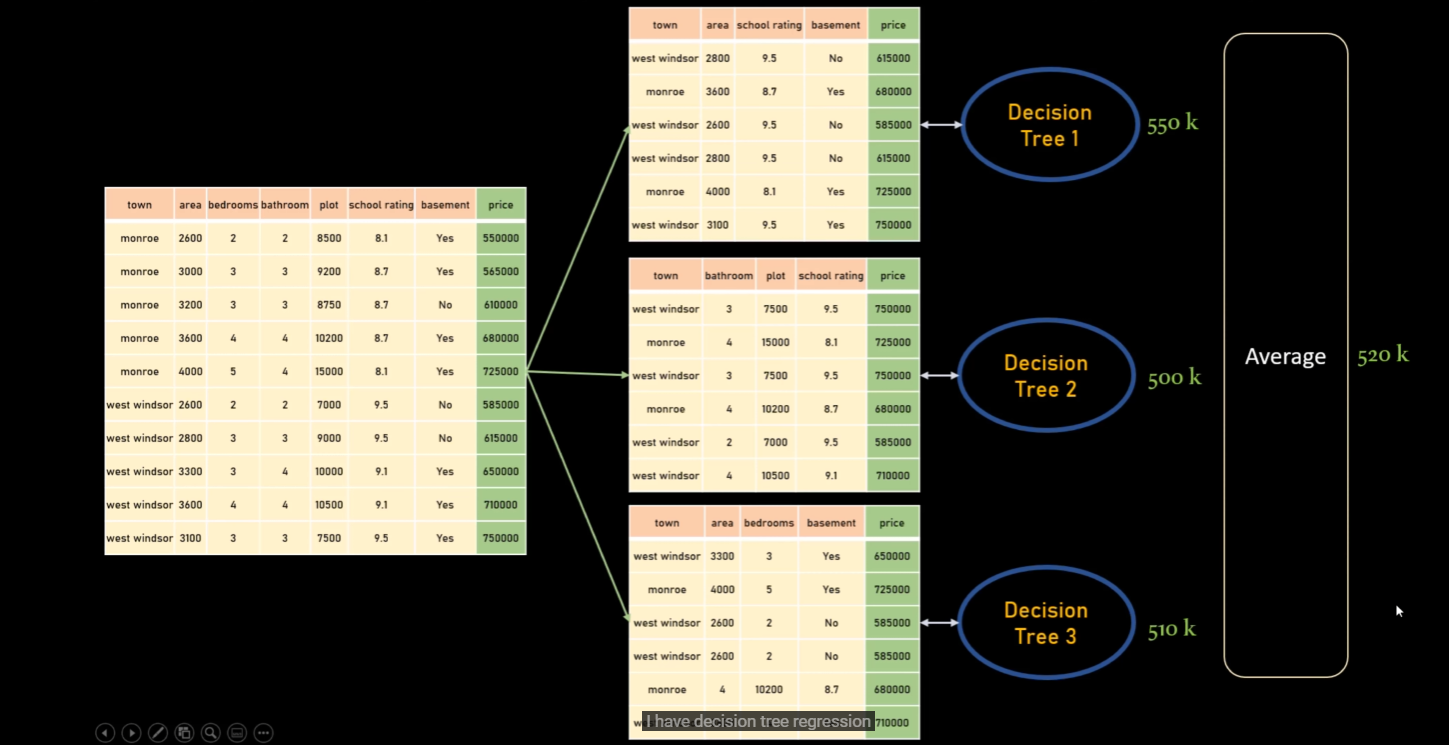

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
x = df.drop('Outcome',axis='columns')

In [9]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [11]:
y = df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled =scaler.fit_transform(x)
x_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2)

In [18]:
x_train.shape

(614, 8)

In [20]:
y_train.value_counts()

Outcome
0    401
1    213
Name: count, dtype: int64

### Train using stand alone model

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [27]:
scores = cross_val_score(DecisionTreeClassifier(), x, y, cv=5)
scores

array([0.7012987 , 0.68181818, 0.7012987 , 0.75816993, 0.7124183 ])

In [28]:
scores.mean()

0.7110007639419405

### Train using Bagging

In [29]:
from sklearn.ensemble import BaggingClassifier

In [32]:
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), # ---> what algorithm
    n_estimators=100, # --> how much subgroups/subsets of data
    max_samples=0.8, # --> use 80% samples form the data
    oob_score=True, # --> the data which is not in the sample so that data is use as a test data , and that score is the oob_score
    random_state=0
)
bag_model.fit(x_train,y_train)
bag_model.oob_score_ # even we have not used a x_test and y_test for getting score of the model 

C:\Users\Rohan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.747557003257329

In [34]:
bag_model.score(x_test, y_test)

0.7792207792207793

In [39]:
# now will uuse cross_val_score ---> folds
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
scores = cross_val_score(bag_model, x, y, cv=50)
scores.mean()

C:\Users\Rohan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Rohan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Rohan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Rohan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sk

0.7626666666666666